In [261]:
import cv2
import face_recognition
import matplotlib.pyplot as plt
%matplotlib inline

In [318]:
def convertToRGB(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [319]:
HAR_CLASSIFIER = cv2.CascadeClassifier('data/haar_train_data.xml')

In [320]:
def detect_faces_har(image):
    """
    image: colored image
    Return: returns bounding boxes for faces
    """
    gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    faces = HAR_CLASSIFIER.detectMultiScale(gray_image,scaleFactor = 1.1, minNeighbors=5)
    return faces

In [334]:
def detect_faces_nn(image):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    return face_recognition.face_locations(image,number_of_times_to_upsample=2,model='hog')

In [335]:
def crop_to_faces(face_positions,image):
    """
    face_positions: List of bounding boxes for faces
    image: colored image to be cropped to faces
    Return: list of cropped images
    """
    cropped_image_list = []
    for (x,y,w,h) in face_positions:
        cropped_image = image[y:y+h, x:x+w]
        cropped_image_list.append(cropped_image)
    return cropped_image_list

In [336]:
def draw_bounding_boxes(image,face_positions):
    for (x,y,w,h) in face_positions:
        cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),1)
    return image

In [324]:
test_img = cv2.imread('data/face_detect_test.jpg')
test_img2 = cv2.imread('data/face_detect_test2.jpg')

In [269]:
faces1 = detect_faces_har(test_img)
faces2 = detect_faces_har(test_img2)

In [270]:
print("Faces1: ",len(faces1))
print("Faces2: ", len(faces2))

Faces1:  9
Faces2:  51


In [271]:
test_img = convertToRGB(test_img)
test_img2 = convertToRGB(test_img2)
draw_bounding_boxes(test_img,faces1)
draw_bounding_boxes(test_img2,faces2)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[149, 150, 144],
        [149, 150, 144],
        [149, 150, 144],
        ...,
        [ 20,  52, 103],
        [ 19,  51, 102],
        [ 19,  51, 102]],

       [[149, 150, 144],
        [149, 150, 144],
        [149, 150, 144],
        ...,
        [ 19,  51, 102],
        [ 17,  49, 100],
        [ 16,  48,  99]],

       [[149, 150, 144],
        [149, 150, 144],
        [148, 149, 143],
        ...,
        [ 18,  50, 101],
        [ 16,  48,  99],
        [ 14,  46,  97]]

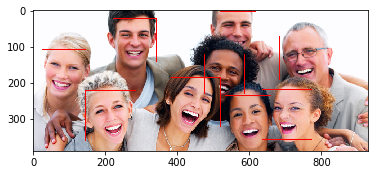

In [272]:
plt.imshow(test_img)


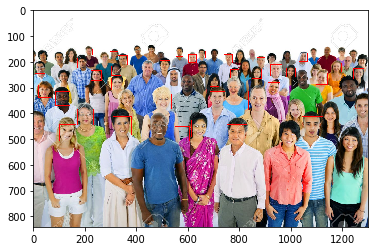

In [273]:
plt.imshow(test_img2)

In [337]:
def extract_images_from_video(video_path,save_path,tag,offset = 0,interval = 1000):
    vidcap = cv2.VideoCapture(video_path)

    count = 0
    start_time = offset
    
    vidcap.set(cv2.CAP_PROP_POS_MSEC,start_time)   
    success, image = vidcap.read()
    while success:
        cv2.imwrite(save_path+"/%s_frame_%d.jpg"%(tag,count),image)
        start_time += interval
        
        count+=1
        vidcap.set(cv2.CAP_PROP_POS_MSEC,start_time)
        success, image = vidcap.read()
    print('Images extracted from video')

In [206]:
extract_images_from_video('data/raw_videos/VID_20180711_134614.mp4','data/raw_images','1',interval=700)

Images extracted from video


In [185]:
extract_images_from_video('data/raw_videos/VID_20180711_134539.mp4','data/raw_images','2',interval=700)

Images extracted from video


In [186]:

extract_images_from_video('data/raw_videos/VID_20180711_134736.mp4','data/raw_images','3',interval=700)

Images extracted from video


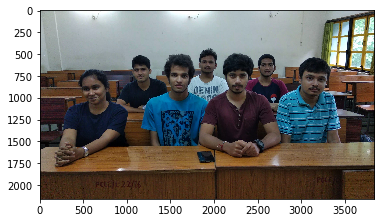

In [349]:
test_img = cv2.imread('data/raw_images/2_frame_2.jpg')
plt.imshow(convertToRGB(test_img))

In [350]:
face_locations = detect_faces_har(test_img)

In [351]:
len(face_locations)

8

In [352]:
test_img2 =  draw_bounding_boxes(convertToRGB(test_img),face_locations)

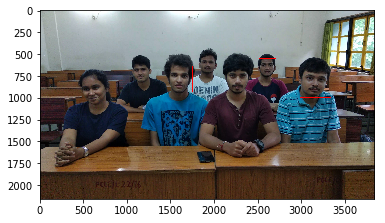

In [353]:
plt.imshow(test_img2)

In [354]:
cropped_faces = crop_to_faces(face_locations,convertToRGB(test_img))

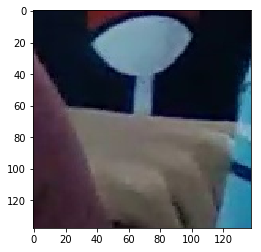

In [356]:
plt.imshow(cropped_faces[0])

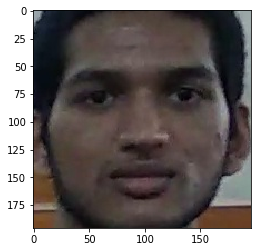

In [357]:
plt.imshow(cropped_faces[1])

In [362]:
from os import listdir
def crop_and_save_all_images(src,dest):
    image_files = listdir(src)
    saved_image_count = 0
    for i in image_files:
        img = cv2.imread(src+'/'+i)
        face_locations = detect_faces_har(img)
        cropped_images = crop_to_faces(face_locations,img)
        for j in cropped_images:
            cv2.imwrite(dest+'/%d.jpg'%saved_image_count,j)
            saved_image_count+=1
    print("Finished Cropping images")

In [363]:
crop_and_save_all_images('data/raw_images','data/unlabelled_images')

Finished Cropping images
